# Ingeniería de variables

En este notebook vamos a realizar el proceso de ingeniería de variables, una fase esencial en la preparación de datos para modelos de Machine Learning. La ingeniería de variables, también conocida como feature engineering, se compone de una serie de pasos diseñados para optimizar la calidad de los datos y mejorar el rendimiento predictivo de los modelos. Los pasos que vamos a abordar en esta parte son:
- Transformación previa de los datos para entrenar los modelos
- La selección de variables utilizando diversos métodos
- Creación de nuevas variables para nuestro problema

### Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

## Cargamos los datos después del EDA

In [2]:
pd_fraude_train = pd.read_csv('./data/train_fraude_eda.csv')
pd_fraude_test = pd.read_csv('./data/test_fraude_eda.csv')

In [3]:
pd_fraude_train = pd_fraude_train.drop('Unnamed: 0', axis=1)
pd_fraude_test = pd_fraude_test.drop('Unnamed: 0', axis=1)

In [4]:
print(pd_fraude_train.shape, pd_fraude_test.shape)

(800000, 32) (200000, 32)


In [5]:
X_train = pd_fraude_train.drop('fraud_bool', axis=1) #Separamos la variable objetivo
y_train = pd_fraude_train['fraud_bool']
X_test = pd_fraude_test.drop('fraud_bool', axis=1)
y_test = pd_fraude_test['fraud_bool']

En el apartado del EDA, habíamos hecho una lista con variables que no teníamos muy claro si las queríamos eliminar o no. Además, estaba la variable 'device_fraud_count' que decidimos eliminar porque era constante. Vamos a crear una lista con todas estas variables para poder acudir más tarde a ellas

In [6]:
posibles_variables_eliminar_eda = [
    'intended_balcon_amount',
    'prev_address_months_count',
    'bank_months_count',
    'foreign_request',
    'source',
    'device_distinct_emails_8w',
    'velocity_4w',
    'velocity_24h'
]

# Transformación de los datos

Para poder aplicar la regularicación Lasso y el Random Forest, los datos necesitan ser transformados previamente. Estos modelos no aceptan varibales categóricas, por lo que el primer paso será transformar las variables categóricas a numéricas mediante alguna técnica de codificación. En nuestro caso vamos a realizar un Dummy Encoding, que consiste en crear tantas columnas como categorías distintas tenga una variable categórica, y con False (0) ó True (1) como únicos posibles valores.

### Codificación de las variables categóricas

In [7]:
X_train_dummy = pd.DataFrame(pd.get_dummies(X_train, drop_first=True))

X_test_dummy = pd.DataFrame(pd.get_dummies(X_test, drop_first=True))

# The drop_first = True option is used to eliminate the first dummy column of each categorical variable,
# in order to reduce the correlation between variables

In [8]:
X_train_dummy

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.9,0.422345,-1.0,25.0,30.0,0.013157,-0.960749,213.0,4696.036408,3497.466864,...,True,False,False,False,False,False,False,True,False,False
1,0.2,0.198313,-1.0,21.0,30.0,0.006638,-1.252886,889.0,2569.677368,2729.832979,...,True,False,False,False,False,False,False,True,False,False
2,0.8,0.341157,-1.0,363.0,50.0,0.006486,-1.403261,1383.0,10409.902073,7903.230335,...,False,False,False,False,False,False,False,False,False,False
3,0.9,0.817947,43.0,29.0,20.0,0.002314,-1.733053,1788.0,8111.144738,2998.301163,...,True,False,False,False,False,False,False,False,True,False
4,0.9,0.168177,-1.0,113.0,30.0,0.002860,-1.139760,1575.0,1605.862804,2855.717810,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0.9,0.424608,13.0,21.0,20.0,0.017103,49.753664,1567.0,4041.808473,7075.405386,...,False,False,True,False,False,False,False,True,False,False
799996,0.3,0.848392,10.0,17.0,30.0,0.027428,-1.361251,1805.0,650.345554,5171.917033,...,True,False,False,False,False,False,False,False,False,False
799997,0.9,0.850674,-1.0,50.0,30.0,0.000825,34.953721,1062.0,6639.931565,4068.372525,...,False,False,True,False,False,False,False,False,False,False
799998,0.1,0.076609,-1.0,63.0,20.0,0.005956,27.377363,1038.0,8066.954592,5115.830055,...,False,False,True,False,False,False,False,True,False,False


In [9]:
X_train_dummy.dtypes.to_dict()

{'income': dtype('float64'),
 'name_email_similarity': dtype('float64'),
 'prev_address_months_count': dtype('float64'),
 'current_address_months_count': dtype('float64'),
 'customer_age': dtype('float64'),
 'days_since_request': dtype('float64'),
 'intended_balcon_amount': dtype('float64'),
 'zip_count_4w': dtype('float64'),
 'velocity_6h': dtype('float64'),
 'velocity_24h': dtype('float64'),
 'velocity_4w': dtype('float64'),
 'bank_branch_count_8w': dtype('float64'),
 'date_of_birth_distinct_emails_4w': dtype('float64'),
 'credit_risk_score': dtype('float64'),
 'email_is_free': dtype('int64'),
 'phone_home_valid': dtype('int64'),
 'phone_mobile_valid': dtype('int64'),
 'bank_months_count': dtype('float64'),
 'has_other_cards': dtype('int64'),
 'proposed_credit_limit': dtype('float64'),
 'foreign_request': dtype('int64'),
 'session_length_in_minutes': dtype('float64'),
 'keep_alive_session': dtype('int64'),
 'device_distinct_emails_8w': dtype('float64'),
 'device_fraud_count': dtype('

### Escalado de variables

El siguiente paso no es obligatorio a la hora de aplicar estos métodos, pero es muy interesante realizar un escalado de las variables como un estandarizado o normalizado. Esto es de utilidad cuando algunas variables tienen rangos de valores distintos, ya que puede afectar al rendimiento de estos algoritmos.

En este caso vamos a utilizar un Estandarizado (hace que cada variable tenga media 0 y desviación típica de 1), pero otras opciones podrían ser un MinMaxScaler() o un RobustScaler(), siendo ésta última muy interesante cuando hay muchos valores outliers.

In [10]:
scaler = StandardScaler()

# Fit the scaler to the training set and transform the data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_dummy), columns=X_train_dummy.columns, index=X_train.index)

# Transform the test set using the same scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test_dummy), columns=X_test_dummy.columns, index=X_test.index)

Evidentemente no vamos a estandarizar la variable objetivo, ya que solo queremos que valga 0 ó 1

In [11]:
X_train_scaled.describe()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
count,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,...,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05,8.000000e+05
mean,4.972556e-16,1.963940e-16,1.090683e-17,-4.476419e-17,-1.466116e-16,-7.020162e-17,9.137580e-17,9.183765e-18,4.538947e-16,-3.285017e-16,...,8.069989e-17,1.399769e-17,1.621814e-17,7.176482e-18,1.030287e-18,-3.937295e-17,-9.093171e-17,-3.982592e-17,7.642775e-17,-3.726797e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.594354e+00,-1.709282e+00,-4.022039e-01,-9.912425e-01,-1.971091e+00,-1.904586e-01,-1.196220e+00,-1.563583e+00,-1.938893e+00,-2.331783e+00,...,-7.700178e-01,-1.635121e-01,-4.511135e-01,-4.120531e-02,-1.569429e-02,-8.405092e-02,-2.384396e-01,-7.215865e-01,-5.985692e-01,-8.550921e-02
25%,-9.053391e-01,-9.284075e-01,-4.022039e-01,-7.650734e-01,-1.139290e+00,-1.891229e-01,-4.867322e-01,-6.752336e-01,-7.410401e-01,-7.954189e-01,...,-7.700178e-01,-1.635121e-01,-4.511135e-01,-4.120531e-02,-1.569429e-02,-8.405092e-02,-2.384396e-01,-7.215865e-01,-5.985692e-01,-8.550921e-02
50%,1.281835e-01,-5.524821e-03,-4.022039e-01,-3.918943e-01,-3.074887e-01,-1.876382e-01,-4.693653e-01,-3.081552e-01,-1.148563e-01,-1.269699e-02,...,-7.700178e-01,-1.635121e-01,-4.511135e-01,-4.120531e-02,-1.569429e-02,-8.405092e-02,-2.384396e-01,-7.215865e-01,-5.985692e-01,-8.550921e-02
75%,8.171986e-01,9.053204e-01,-1.070849e-01,4.901654e-01,5.243122e-01,-1.855658e-01,-1.762519e-01,3.702934e-01,6.699187e-01,6.636082e-01,...,1.298671e+00,-1.635121e-01,-4.511135e-01,-4.120531e-02,-1.569429e-02,-8.405092e-02,-2.384396e-01,1.385835e+00,1.670651e+00,-8.550921e-02
max,1.161706e+00,1.750211e+00,8.269754e+00,3.826160e+00,4.683317e+00,1.439408e+01,5.156861e+00,5.100532e+00,3.671708e+00,3.203541e+00,...,1.298671e+00,6.115755e+00,2.216737e+00,2.426871e+01,6.371745e+01,1.189755e+01,4.193935e+00,1.385835e+00,1.670651e+00,1.169465e+01


# Selección de variables

La selección de las variables consiste en elegir aquellas variables que nos pueden resultar más útiles a la hora de entrenar modelos de Machine Learning. Para ello, vamos a utilizar distintos métodos que nos indican cuáles son las variables con una mayor importancia en relación a la variable objetivo. Los métodos que emplearemos son:

- Regularización Lasso
- Random Forest

Utilizaremos la información obtenida de los métodos sumada a la que ya sabemos del EDA y nuestro juicio personal para realizar la selección de las variables.

### Regularización Lasso

La Regularización Lasso es una técnica que se utiliza para la selección de variables cuando tenemos bastantes atributos y algunos de ellos no contribuyen significativamente al modelo. Es una técnica que emplea una función de costo del modelo basada en la suma absoluta de los coeficientes, y le agrega unas penalizaciones a dichos coeficientes. Esta penalización hace que algunos coeficientes se vuelvan cero.

In [12]:
%%time

sel_lasso = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'), threshold=0.08)
sel_lasso.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
                threshold=0.08)

Hemos seleccionado penalty como 'L1' para indicar que es una regresión Lasso y el solver como 'liblinear' porque es el único junto a 'saga' compatible con la regularización Lasso. Hemos elegido 'liblinear' por encima de 'saga' porque este último funciona mejor con datasets largos y problemas multiclase. Por último, hemos seleccionado el umbral en 0.08, pero lo podemos modificar en función de cuánto queremos que penalice el modelo.

In [13]:
sel_lasso.get_support()
selected_feat_lasso = X_train_scaled.columns[sel_lasso.get_support()]
selected_feat_lasso

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'customer_age', 'intended_balcon_amount', 'zip_count_4w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request',
       'keep_alive_session', 'device_distinct_emails_8w', 'month',
       'payment_type_AC', 'employment_status_CB', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
       'device_os_macintosh', 'device_os_other', 'device_os_windows'],
      dtype='object')

In [14]:
print('variables totales: {}'.format((X_train_scaled.shape[1])))
print('varaibles seleccionadas: {}'.format(len(selected_feat_lasso)))

variables totales: 47
varaibles seleccionadas: 29


Guardamos las variables seleccionadas por la Regularización Lasso en una lista, y también vamos a guardar en otra lista el resto de variables que no han sido seleccionadas:

In [15]:
lasso_variables = [
    'income',
    'name_email_similarity',
    'prev_address_months_count',
    'customer_age',
    'intended_balcon_amount',
    'zip_count_4w',
    'date_of_birth_distinct_emails_4w',
    'credit_risk_score',
    'email_is_free',
    'phone_home_valid',
    'bank_months_count',
    'has_other_cards',
    'proposed_credit_limit',
    'foreign_request',
    'keep_alive_session',
    'devide_distinct_emails_8w',
    'month',
    'payment_type',
    'employment_status',
    'housing_status',
    'device_os'
]

In [16]:
def obtener_resto_variables(df, lista_variables):
    '''
    ----------------------------------------------------------------------------------------------------------
    Function obtener_resto_variables:
    ----------------------------------------------------------------------------------------------------------
        -Description: Function that saves in a list the rest of the variables of a df that are not in a list
        -Inputs: 
            -- df: Pandas dataframe containing the variables we are working with
            -- lista_variables: List whose elements are the variables that we are not going to save in the list that we generate
        -Return:
            -- lista_resto_variables: list with the names of the dataset variables that are not
            found in the list that we have passed as input
    '''
    
    lista_resto_variables = []
    
    for variable in df.columns:
        if variable not in lista_variables:
            lista_resto_variables.append(variable)
    
    return lista_resto_variables

In [17]:
lasso_variables_eliminar = obtener_resto_variables(X_train, lasso_variables)

lasso_variables_eliminar

['current_address_months_count',
 'days_since_request',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'phone_mobile_valid',
 'source',
 'session_length_in_minutes',
 'device_distinct_emails_8w',
 'device_fraud_count']

lasso_variables_eliminar = []

for variable in X_train.columns:
    if variable not in lasso_variables:
        lasso_variables_eliminar.append(variable)

Queremos representar gráficamente los coeficientes de las variables para ver la importancia que les ha asignado la Regularización Lasso

CPU times: total: 31.2 ms
Wall time: 57.2 ms


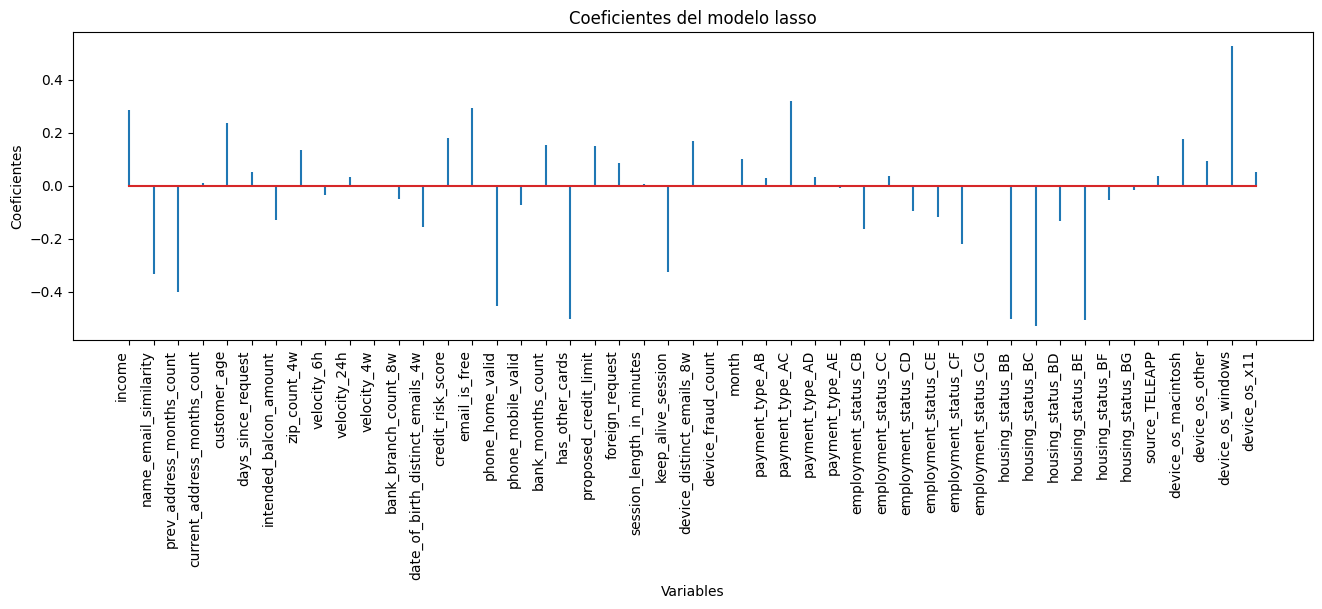

In [18]:
df_coeficientes_lasso = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': sel_lasso.estimator_.coef_.flatten()})

fig, ax = plt.subplots(figsize=(16, 4))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')

#We rotate the variables so that they can be read
plt.xticks(rotation=90, ha='right', size=10)

ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo lasso');

Algunas de las variables que el modelo interpreta como más importantes son 'income', 'name_email_similarity', 'prev_address_months_count', 'customer_age', 'email_is_free', 'phone_home_valid', 'has_other_cards', 'keep_alive_session', 'payment_type', 'employment_status', 'housing_status' y 'device_os'.

Es interesante que en las variables categóricas, las dummy tienen importancias muy dispares unas con otras. Esto habrá que analizarlo más detenidamente y decidir qué hacer con ellas.

### Random Forest

Para el Random Forest vamos a utilizar los datos transformados con el One-hot pero sin escalar, ya que este módelo funciona muy bien con conjuntos de datos sin escalar. Esta técnica es un algoritmo de Machine Learning que está conformada por múltiples Árboles de Decisión, y nos proporciona una medida de la importancia de cada variable que se calcula en función de la contribución de cada variable al rendimiento del Bosque. Las variables más importantes tienen un mayor impacto en las decisiones del modelo.

                            Variable  Importancia
1              name_email_similarity     0.072741
5                 days_since_request     0.068690
13                 credit_risk_score     0.067728
10                       velocity_4w     0.067155
8                        velocity_6h     0.064955
21         session_length_in_minutes     0.064758
6             intended_balcon_amount     0.063988
7                       zip_count_4w     0.063973
9                       velocity_24h     0.063324
3       current_address_months_count     0.058382
12  date_of_birth_distinct_emails_4w     0.041423
11              bank_branch_count_8w     0.038644
25                             month     0.028845
17                 bank_months_count     0.028638
19             proposed_credit_limit     0.027102
4                       customer_age     0.025278
0                             income     0.023891
14                     email_is_free     0.009805
45                 device_os_windows     0.009317


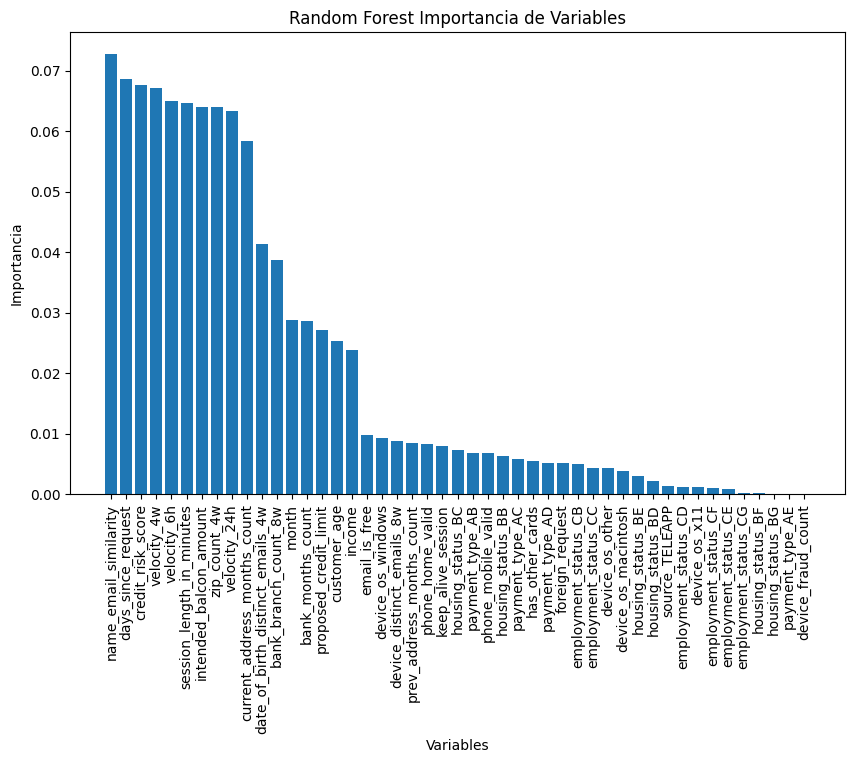

CPU times: total: 3min 26s
Wall time: 5min 43s


In [19]:
%%time

random_forest_model = RandomForestClassifier(random_state=33)
random_forest_model.fit(X_train_dummy, y_train)

# We obtain the importance of the variables
importancia_variables = random_forest_model.feature_importances_

# We create a DataFrame to visualize the importances
importancias_df = pd.DataFrame({'Variable': X_train_dummy.columns, 'Importancia': importancia_variables})

# We sort the DataFrame by descending importance
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

print(importancias_df)

# We graph the importances
plt.figure(figsize=(10, 6))
plt.bar(importancias_df['Variable'], importancias_df['Importancia'])
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Random Forest Importancia de Variables')
plt.show()

Viendo el gráfico de importancia de variables, voy a considerar las más importantes aquellas variables que tienen una importancia mayor del 0.02

In [20]:
rf_variables = [
    'name_email_similarity',
    'days_since_request',
    'credit_risk_score',
    'velocity_4w',
    'velocity_6h',
    'session_length_in_minutes',
    'intended_balcon_amount',
    'zip_count_4w',
    'velocity_24h',
    'current_address_months_count',
    'date_of_birth_distinct_emails_4w',
    'bank_branch_count_8w',
    'month',
    'bank_months_count',
    'proposed_credit_limit',
    'customer_age',
    'income'
]

Se pueden observar algunas diferencias que son curiosas entre ambos métodos respecto a algunas variables:

- 'days_since_request', 'velocity_4w', 'velocity_6h', 'session_length_in_minutes', 'velocity_24h', 'current_address_months_count' y 'bank_branch_count_8w' tiene las respectivas posiciones de 2º, 4º, 5º, 6º, 9º, 10º y 12º de variables con más importancia según RandomForest, pero según el método Lasso con nuestro threshold, están en el grupo de variables con poca importancia. Las diferencias pueden ser debidas a la naturaleza específica de los datos y cómo cada método aborda la selección de características. Suele ser común observar variaciones en la importancia de las variables entre métodos, y no necesariamente implica que uno sea correcto o incorrecto. En cambio, proporcionan diferentes perspectivas sobre la importancia de las variables en función de la metodología utilizada. Puede ser útil considerar las fortalezas y debilidades de cada método y, posiblemente, combinar sus resultados para obtener una visión más completa.

- 'phone_mobile_valid', 'device_distinct_emails_8w', 'source' y 'device_fraud_count' son las únicas variables que ambos modelos coinciden en que son menos importantes, y junto a las variables anteriores son las 11 variables menos importantes para la Regularización Lasso. Si hubiésemos subido el umbral en Lasso, probablemente habría dejado más variables fuera del rango de importancia.

- El resto de variables son todas importantes para la Regularización Lasso, pero en el RandomForest están divididas entre los dos grupos de importancia. Más abajo vamos a analizar más detalladamente las variables por individual y decidiremos qué hacemos con ellas.

In [21]:
rf_variables_eliminar = obtener_resto_variables(X_train, rf_variables)

rf_variables_eliminar

['prev_address_months_count',
 'payment_type',
 'employment_status',
 'email_is_free',
 'housing_status',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'foreign_request',
 'source',
 'device_os',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count']

rf_variables_eliminar = []

for variable in X_train.columns:
    if variable not in rf_variables:
        rf_variables_eliminar.append(variable)
        
rf_variables_eliminar

In [22]:
posibles_variables_eliminar = [
    'intended_balcon_amount',
    'prev_address_months_count',
    'bank_months_count',
    'foreign_request',
    'source',
    'device_distinct_emails_8w',
    'velocity_4w',
    'velocity_24h'
]

Vamos a obtener las variables que están por debajo del umbral de importancia en al menos uno de los métodos

In [23]:
variables_eliminar_lasso_rf = []

for variable in X_train.columns:
    if variable in lasso_variables_eliminar or variable in rf_variables_eliminar:
        variables_eliminar_lasso_rf.append(variable)
        
variables_eliminar_lasso_rf

['prev_address_months_count',
 'current_address_months_count',
 'days_since_request',
 'payment_type',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'employment_status',
 'email_is_free',
 'housing_status',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'foreign_request',
 'source',
 'session_length_in_minutes',
 'device_os',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count']

Estas 21 variables, según al menos uno de los métodos (Lasso y RandomForest) no aportan mucha importancia a la variable objetivo. Vamos a analizar estas variables una a una y decidir si las mantenemos o no:

- 'prev_address_months_count': esta variable según el método de Random Forest no tiene mucha importancia, pero según el método de Lasso si. Vimos en el EDA que poseía una gran cantidad de valores missing y de outliers, y que estos tenían una mucha importancia a la hora de detectar fraudes, por esto, aunque en el Random Forest no tenga mucha importancia, consideramos que esta variable si que debemos conservarla para no perder información valiosa.
- 'current_address_months_count': esta variable según el método de Random Forest tiene mucha importancia, pero según el método de Lasso no. En el EDA vimos que esta variable presenta un gran número de valores outliers, y por esta razón decidimos no eliminarla.
- 'days_since_request': esta variable según el método de Random Forest tiene mucha importancia, pero según el método de Lasso no. Bajo nuestro criterio, no tenemos muy claro si esta variable nos ayuda a detectar fraudes, y preferimos mantenerla por las dudas. Sería interesante más adelante hacer un análisis de la explicabilidad.
- 'payment_type': esta variable tiene 5 categorías distintas, en el Random Forest ninguna de ellas tiene mucha importancia pero en el Lasso solo una de las categorías tiene una importancia superior a nuestro umbral. Los valores están anonimizados, por lo que no sabemos qué significa cada categoría, y preferimos mantener la variable y no eliminar información que potencialmente puede ser útil para detectar el fraude.
- 'velocity_6h', 'velocity_24h' y 'velocity_4w': estas variables las voy a analizar de la misma forma debido a su parecido. Según el método de Random Forest tienen mucha importancia, pero según el método de Lasso no superan el umbral que hemos seleccionado. Bajo nuestro criterio, no pensamos que estas variables aporten mucha información a la hora de detectar un posible fraude, y como en el EDA vimos que todas estas presentaban cierto grado de correlación con la variable 'month' (la cuál vamos a mantener) hemos decidido que vamos a eliminar estas tres variables.
- 'bank_branch_count_8w': esta variable según el método de Random Forest tiene una importancia relativa, pero según el método de Lasso no llega a superar el umbral que hemos seleccionado. En el EDA vimos que la variable presentaba un gran número de outliers y no queremos peder tanta información valiosa al eliminarla, además de que puede ser una variable útil para detectar aquellas ramas del banco donde se produzcan un mayor número de fraudes. Decidimos no eliminarla. 
- 'employment_status': esta variable tiene 7 categorías distinas, en el Random Forest ninguna de ellas tiene mucha importancia, pero en el Lasso algunas de ellas superan el umbral de importancia. Como están anonimizadas las categorías no sabemos lo que significan, y preferimos mantener la variable y no eliminar información que potencialmente puede ser útil para detectar el fraude.
- 'email_is_free': esta variable según el método de Random Forest no tiene mucha importancia, pero según el método Lasso tiene una importancia superior a nuestro umbral. Bajo nuestro criterio, y sabiendo que la variable indica si el dominio del email que utiliza el solicitante es de pago o no, pensamos que esta variable ayuda más a detectar los casos donde no se comete fraude, pero no es tan útil para detectar el fraude que es lo que más nos interesa. Debido a esto, decidimos que esta variable la podemos eliminar.
- 'housing_status': esta variable tiene 7 categorías distinas, en el Random Forest ninguna de ellas tiene mucha importancia, pero en el Lasso algunas de ellas superan el umbral de importancia. Como están anonimizadas las categorías no sabemos lo que significan, y preferimos mantener la variable y no eliminar información que potencialmente puede ser útil para detectar el fraude.
- 'phone_home_valid': esta variable según el método de Random Forest no tiene mucha importancia pero según el método de Lasso tiene una alta importancia. Bajo nuestro criterio, la validez del número de teléfono de "casa" puede ser útil para verificar la credibilidad de los datos proporcionado por el solicitante y detectar fraudes. También puede darse el caso de que el solicitante no tenga un numero de "casa", algo muy común a día de hoy. Como no tenemos forma de diferenciar entre esos casos hemos decidido mantener la variable.
- 'phone_mobile_valid': esta variable no tiene mucha importancia para ninguno de los métodos y vimos en el EDA que aunque no fuese constante, el 88% de sus valores eran iguales. Bajo nuestro criterio, la información que proporciona esta variable no parece muy útil a la hora de detectar el fraude y decidimos eliminarla.
- 'has_other_cards': esta variable según el método de Random Forest no tiene mucha importancia, pero según el método Lasso tiene una importancia superior a nuestro umbral. Bajo nuestro criterio, y sabiendo que la variable indica si el solicitante tiene otras tarjetas del mismo banco, pensamos que esta variable ayuda más a detectar los casos donde no se comete fraude, porque entendemos que la proporción de fraudes va a ser menor en las personas que tienen más de una tarjeta con el mismo banco, pero no tiene porque ser mayor esta proporción en personas con una sola tarjeta, que es algo bastante común. Debido a esto, decidimos que esta variable la podemos eliminar.
- 'foreign_request': esta variable según el método de Random Forest no tiene mucha importancia, pero según el método Lasso tiene una importancia superior al umbral, aunque si ser muy alta. Bajo nuestro criterio, es una variable que deberíamos mantener porque a pesar de ser casi constante, una solicitud extranjera podría indicar un comportamiento atípico, sobretodo si la mayoría de solicitudes provienen de un área geográfica específica.
- 'source': ambos métodos consideran a esta variable poco importante, y ya vimos en el EDA que es prácticamente constante, por lo que decidimos eliminar esta variable.
- 'session_length_in_minutes': esta variable según el método de Random Forest tiene mucha importancia, pero según el método de Lasso no. Según nuestro criterio, esta variable puede ser importante para el modelo, y viendo la información de sus valores, sería muy interesante ver la explicabilidad de esta variable más adelante. El rango de valores llega hasta 107 minutos que un usuario ha estado con la sesión activa, lo cuál nos parece mucho tiempo, y si analizamos la explicabilidad puede que encontremos alguna tendencia donde aumente la proporción de fraudes a medida que aumente la duración de la sesión por ejemplo. Decidimos mantener esta variable.
- 'device_os': esta variables tiene 5 categorías distintas, y solo según el método de Lasso, algunas de estas categorías tienen una importancia superior al umbral , destacando la categoría 'windows' sobre las demás. No tenemos muy claro la utilidad de esta variable a la hora de detectar posibles fraudes, por lo que preferimos mantenerla y no arriesgarnos a perder información valiosa.
- 'keep_alive_session': esta variable no tiene mucha importancia para el método de Random Forest, pero tiene una importancia relativa para Lasso. Bajo nuestro criterio, el significado de esta variable no está muy relacionada con el hecho de que se cometa fraude o no, por lo que considerando toda la información de la que disponemos, decidimos que podemos prescindir de esta varible en nuestro modelo.
- 'device_distinct_emails_8w': esta variable no tiene mucha importancia para ninguno de los métodos, sin embargo, en el EDA vimos que esta variable posee una gran cantidad de outliers que pueden contener información útil a la hora de detectar los casos de fraude, por lo que decidimos mantenerla.
- 'device_fraud_count: esta variable ya decidimos en el EDA que la íbamos a eliminar debido a que es constante y no aporta ninguna información.

In [24]:
mantener = [
    'prev_address_months_count',
    'current_address_months_count',
    'session_length_in_minutes',
    'device_distinct_emails_8w',
    'foreign_request',
    'bank_branch_count_8w',
    'phone_home_valid',
    'payment_type',
    'housing_status',
    'employment_status',
    'device_os',
    'days_since_request'
]

In [25]:
eliminar = [
    'phone_mobile_valid',
    'source',
    'keep_alive_session',
    'device_fraud_count',
    'email_is_free',
    'has_other_cards',
    'velocity_6h',
    'velocity_24h',
    'velocity_4w'
]

In [26]:
variables_mantener_lasso_rf = []

for variable in X_train.columns:
    if variable in lasso_variables and variable in rf_variables:
        variables_mantener_lasso_rf.append(variable)

variables_mantener_lasso_rf

['income',
 'name_email_similarity',
 'customer_age',
 'intended_balcon_amount',
 'zip_count_4w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'month']

Estas 10 variables son las que ambos métodos coinciden en mantener según nuestros criterios de selección. De estas variables hay algunas que teníamos dudas en el EDA respecto a mantenerlas o no:

- 'intended_balcon_amount'
- 'bank_months_count'

Vimos durante el EDA que ambas variables presentaban un alto porcentaje de valores missing, además, la variable 'intended_balcon_amount' también presentaba una gran cantidad de outliers. A pesar de esto, contienen información muy valiosa respecto a la variable objetivo y ambos métodos lo interpretan y les dan mucha importancia a las variables, por lo que las vamos a mantener.

El resto de las variables las consideramos importantes para el entrenamiento de modelos y decidimos mantenerlas

In [27]:
total_mantener = []

for variable in X_train.columns:
    if variable in mantener or variable in variables_mantener_lasso_rf:
        total_mantener.append(variable)
        
total_mantener

['income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'payment_type',
 'zip_count_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'employment_status',
 'credit_risk_score',
 'housing_status',
 'phone_home_valid',
 'bank_months_count',
 'proposed_credit_limit',
 'foreign_request',
 'session_length_in_minutes',
 'device_os',
 'device_distinct_emails_8w',
 'month']

Eliminamos las columnas seleccionadas del conjunto de train y test

In [28]:
X_train_t = X_train_scaled.drop(columns=[
    'phone_mobile_valid',
    'source_TELEAPP',
    'keep_alive_session',
    'device_fraud_count',
    'email_is_free',
    'has_other_cards',
    'velocity_6h',
    'velocity_24h',
    'velocity_4w'
])

X_test_t = X_test_scaled.drop(columns=[
    'phone_mobile_valid',
    'source_TELEAPP',
    'keep_alive_session',
    'device_fraud_count',
    'email_is_free',
    'has_other_cards',
    'velocity_6h',
    'velocity_24h',
    'velocity_4w'
])

In [29]:
X_train_t.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,...,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,1.161706,-0.248184,-0.402204,-0.697223,-0.307489,-0.188013,-0.475814,-1.352687,-0.376807,-0.298990,...,-0.594112,1.298671,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,1.385835,-0.598569,-0.085509
1,-1.249847,-1.023223,-0.402204,-0.742456,-0.307489,-0.189225,-0.490259,-0.680208,-0.396420,0.297016,...,-0.594112,1.298671,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,1.385835,-0.598569,-0.085509
2,0.817199,-0.529054,-0.402204,3.125036,1.356113,-0.189253,-0.497694,-0.188780,1.229312,-0.696327,...,1.683183,-0.770018,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,-0.721586,-0.598569,-0.085509
3,1.161706,1.120400,0.596660,-0.651989,-1.139290,-0.190029,-0.514001,0.214111,-0.363731,1.489026,...,-0.594112,1.298671,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,-0.721586,1.670651,-0.085509
4,1.161706,-1.127479,-0.402204,0.297922,-0.307489,-0.189927,-0.484666,0.002220,-0.396420,0.098347,...,-0.594112,-0.770018,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,1.385835,-0.598569,-0.085509


# Creación de variables

Pensamos que puede ser interesante crear una variable que sea el ratio de 'income' con 'proposed_credit_limit'.

¿Qué información nos puede ofrecer esta variable? En situaciones normales, es probable que los solicitantes tengan un ratio saludable entre sus ingresos y el límite de crédito propuesto. Un solicitante con ingresos más altos podría tener un límite de crédito propuesto más alto, y viceversa. Este ratio reflejaría una relación proporcional típica. En casos de fraude, un indicador de alerta podría ser un ratio inusualmente bajo entre los ingresos declarados y el límite de crédito propuesto. Por ejemplo, si alguien con ingresos modestos solicita un límite de crédito significativamente alto, podría indicar un intento de obtener crédito de manera fraudulenta.

Después de crear la variable vamos a eliminar de nuestro dataset las variables 'income' y 'proposed_credit_limit', ya que estaríamos introduciendo correlación al entrenamiento y podría resultar en un peor desempeño del modelo.

La creación de esta variable tiene que ser previa a la estandarización, de lo contrario estaríamos creando una variable que no tuviese de media 0 y de desviación típica 1. Vamos a aprovechar esta situación para crear una función que al introducirle un dataset de entrenamiento o prueba, realice de manera automatizada los siguientes pasos:
- Separación de la variable objetivo
- Creación de la nueva variable
- Eliminación de variables
- Codificación de las variables categóricas
- Estandarización
- Concatenación de X e y

Resulta evidente, pero esta función será de uso exclusivo para este problema y no podrá aplicarse a otros conjuntos de datos diferentes.

In [30]:
def transformacion_datos(df):
    '''
    ----------------------------------------------------------------------------------------------------------
    Function transformacion_datos:
    ----------------------------------------------------------------------------------------------------------
        -Description: Function that performs the transformation of data for model training
        -Input: 
            -- df: Pandas dataframe containing the data we want to transform
        -Return:
            -- df_transformed: Pandas dataframe with the data already transformed
    '''
    
    #Target variable's split
    X_df = df.drop('fraud_bool', axis=1)
    y_df = df['fraud_bool']
    
    #New variable
    X_df['ratio_inc_cred'] = X_df['income'] / X_df['proposed_credit_limit']
    
    #Variable's drop
    X_df = X_df.drop(columns=[
        'phone_mobile_valid',
        'source',
        'keep_alive_session',
        'device_fraud_count',
        'email_is_free',
        'has_other_cards',
        'velocity_6h',
        'velocity_24h',
        'velocity_4w',
        'income',
        'proposed_credit_limit'
    ])
    
    #Coding categorical variables
    X_df_dummy = pd.DataFrame(pd.get_dummies(X_df, drop_first=True))
    
    #Estandarization
    scaler = StandardScaler()
    X_df_scaled = pd.DataFrame(scaler.fit_transform(X_df_dummy), columns=X_df_dummy.columns, index=X_df_dummy.index)
    
    #We concatenate X and y
    df_transformed = pd.concat((X_df_scaled, y_df), axis=1)
    
    return df_transformed

In [31]:
datos_train_transformados,datos_test_transformados = transformacion_datos(pd_fraude_train),transformacion_datos(pd_fraude_test)

In [32]:
datos_train_transformados['ratio_inc_cred'].describe()

count    8.000000e+05
mean    -1.787726e-16
std      1.000001e+00
min     -1.246266e+00
25%     -9.461766e-01
50%     -2.828208e-01
75%      1.043891e+00
max      1.864358e+00
Name: ratio_inc_cred, dtype: float64

Comprobamos que efectivamente, la nueva variable mantiene una media de 0 y una desviación típica de 1

In [33]:
datos_train_transformados.shape

(800000, 38)

In [34]:
datos_train_transformados.head()

,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,fraud_bool
0,-0.248184,-0.402204,-0.697223,-0.307489,-0.188013,-0.475814,-1.352687,-0.376807,-0.298990,0.143373,...,1.298671,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,1.385835,-0.598569,-0.085509,0
1,-1.023223,-0.402204,-0.742456,-0.307489,-0.189225,-0.490259,-0.680208,-0.396420,0.297016,0.430361,...,1.298671,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,1.385835,-0.598569,-0.085509,0
2,-0.529054,-0.402204,3.125036,1.356113,-0.189253,-0.497694,-0.188780,1.229312,-0.696327,0.573855,...,-0.770018,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,-0.721586,-0.598569,-0.085509,0
3,1.120400,0.596660,-0.651989,-1.139290,-0.190029,-0.514001,0.214111,-0.363731,1.489026,-0.086217,...,1.298671,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,-0.721586,1.670651,-0.085509,0
4,-1.127479,-0.402204,0.297922,-0.307489,-0.189927,-0.484666,0.002220,-0.396420,0.098347,1.190879,...,-0.770018,-0.163512,-0.451114,-0.041205,-0.015694,-0.23844,1.385835,-0.598569,-0.085509,0


Procedemos a guardar los datos ya transformados para poder seguir utilizándolos en los siguientes notebooks

In [35]:
datos_train_transformados.to_csv('./data/pd_train_processed.csv')
datos_test_transformados.to_csv('./data/pd_test_processed.csv')

## Conclusión

En este notebook hemos abarcado algunos de los pasos más característicos de una Ingeniería de Variables. Cabe destacar que cada problema y conjunto de datos es único, por lo que los pasos a realizar en esta parte pueden variar muchos y no hay nada que se pueda hacer ciegamente. Cada paso seguido debe tener un razomaniento detrás, y al final puede haber muchas soluciones válidas.

Dicho lo anterior, los pasos seguidos en este notebook pueden considerarse válidos por el razonamiento seguido, pero es probable que haya mejores combinaciones de variables, de transformaciones de los datos con los que el modelo funcione mejor. En los notebooks futuros se harán pruebas de los modelos con modificaciones de nuestra ingeniería de variables con el fin de encontrar la combinación más óptima.